In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.sparse import hstack,csr_matrix
def metrics(labels,labels_pred):
   #performance metrics calculation
   precision_train = precision_score(labels,labels_pred)
   recall_train = recall_score(labels,labels_pred)
   f1_train = f1_score(labels,labels_pred)
   return precision_train,recall_train,f1_train
def confusion__matrix(labels,labels_pred):
   # confusion matrix calculation
   confusionmatrix = confusion_matrix(labels,labels_pred)
   return confusion_train
def kNN_classifier(features,lebals):
   #kNN classifier
   model = KNeighborsClassifier()
   model.fit(training_features,training_labels)
   return model.predict(features)
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx')
#TF-IDF vectorization for categorical for feature extraction
tfidf_vectorizer = TfidfVectorizer()
text = tfidf_vectorizer.fit_transform(sentence_data["Text"])
numerical_data = sentence_data.iloc[:,1 :-1].values
labels = sentence_data['label'].values
# Combines text features with numerical data
combined_features = hstack([text,csr_matrix(numerical_data)])
# Splits the data into training and testing sets
training_features,testing_features,training_labels,testing_labels = train_test_split(combined_features, labels, test_size=0.3, random_state=42)
# prediction on traing and testing
training_labels_pred =kNN_classifier(training_features,training_labels)
testing_labels_pred = kNN_classifier(testing_features,testing_labels)
# Confusion matrix
confusion_train = confusion_matrix(training_labels, training_labels_pred)
confusion_test = confusion_matrix(testing_labels, testing_labels_pred)
print("CONFUSION MATRIX OF TRAINING DATA:")
print(confusion_train)
#metrics assignment
precision_train,recall_train,f1_train=metrics(training_labels, training_labels_pred)
print("PERFORMANCE METRICS:")
print(f"PRECISION: {precision_train:.2f}")
print(f"RECALL: {recall_train:.2f}")
print(f"F1-SCORE: {f1_train:.2f}")
print(" ")
print("CONFUSION MATRIX OF TESTING DATA:")
print(confusion_test)
#metrics assignment
precision_test,recall_test,f1_test=metrics(testing_labels, testing_labels_pred)
print("PERFORMANCE METRICS:")
print(f"PRECISION: {precision_test:.2f}")
print(f"RECALL: {recall_test:.2f}")
print(f"F1-SCORE: {f1_test:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CONFUSION MATRIX OF TRAINING DATA:
[[327   9]
 [ 15 269]]
PERFORMANCE METRICS:
PRECISION: 0.97
RECALL: 0.95
F1-SCORE: 0.96
 
CONFUSION MATRIX OF TESTING DATA:
[[140   3]
 [  9 114]]
PERFORMANCE METRICS:
PRECISION: 0.97
RECALL: 0.93
F1-SCORE: 0.95


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
def calculate_metrics(actual, predicted):
    #calculates the metrics
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2
drive.mount('/content/drive')
IRCTC= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx',sheet_name="IRCTC Stock Price")
price = IRCTC.copy()
# Using the previous day's price as the prediction
price['Predicted_Price'] = price['Price'].shift(1)
# Drops the NaN value
price = price.dropna()
realprice = price['Price'].values
assumedprice = price['Predicted_Price'].values
# Calculating the metrics
mse, rmse, mape, r2 = calculate_metrics(realprice, assumedprice)
print("METRICS:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"Mean Absolute Percentage Error:{mape:.2f}")
print(f"R2 Score:{r2:.2f}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
METRICS:
Mean Squared Error: 1371.11
Root Mean Squared Error:37.03
Mean Absolute Percentage Error:0.01
R2 Score:0.98


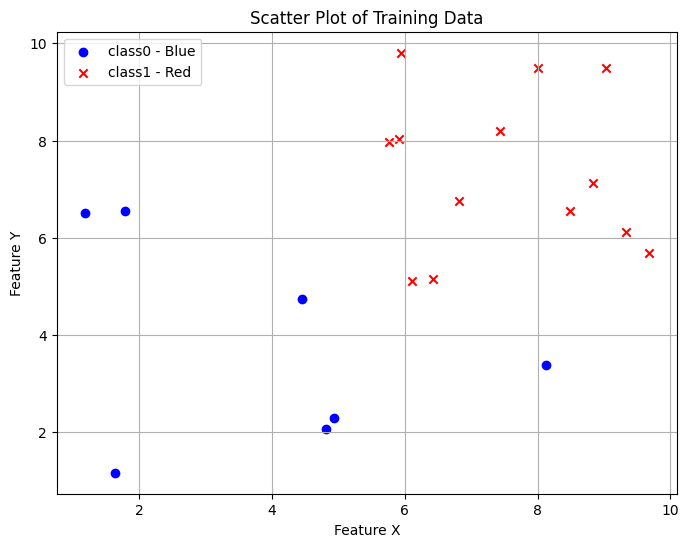

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def plotting(X_train,Y_train,classes):
    plt.figure(figsize=(8, 6))
    #plots
    plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', label='class0 - Blue', marker='o')
    plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', label='class1 - Red', marker='x')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend()
    plt.grid(True)
    plt.show()
np.random.seed(0)
# generating random features between 1 to 10
X_feature= np.random.uniform(1, 10, 20)
Y_feature= np.random.uniform(1, 10, 20)
#classifing based on some condition
classes = np.where(((Y_feature>5)&(X_feature>5)), 1, 0)
plotting(X_feature,Y_feature,classes)

<ipython-input-4-66660d2b4ae0>:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(train_data[classes == 1][:, 0], train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)


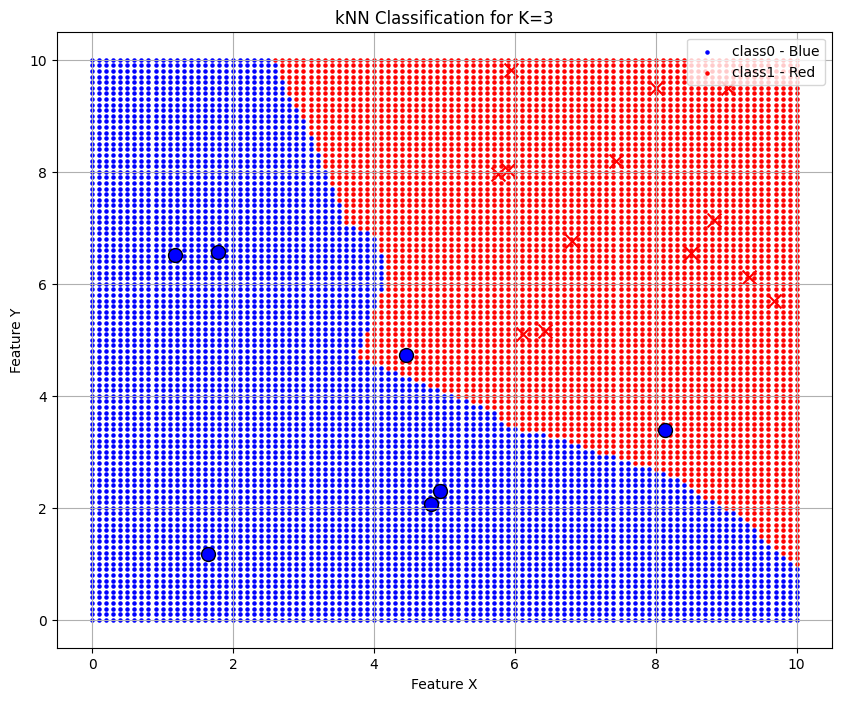

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
def plot_with_knn_predicted_values(train_data,test_data,predicted_classes):
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1],color='blue', label='class0 - Blue', s=5)
    plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1],color='red', label='class1 - Red', s=5)
    plt.scatter(train_data[classes == 0][:, 0], train_data[classes == 0][:, 1], color='blue', edgecolor='black', marker='o', s=100)
    plt.scatter(train_data[classes == 1][:, 0], train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("kNN Classification for K=3")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
def kNN_classifier(train_data,test_data,classes):
   #kNN classifier
   model = KNeighborsClassifier(n_neighbors=3)
   model.fit(train_data,classes)
   return model.predict(test_data)
np.random.seed(0)
# generating random features between 1 to 10
X_feature= np.random.uniform(1, 10, 20)
Y_feature= np.random.uniform(1, 10, 20)
#classifing based on some condition
classes = np.where(((X_feature > 5) & (Y_feature > 5)), 1, 0)
X_feature_range = np.arange(0, 10.1, 0.1)
Y_feature_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_feature_range, Y_feature_range)
# meshgrid into 1D arrays
X_feature_test_flat = X_test.ravel()
Y_feature_test_flat = Y_test.ravel()
# Combining X and Y
test_data = np.c_[X_feature_test_flat, Y_feature_test_flat]
train_data = np.c_[X_feature, Y_feature]
predicted_classes=kNN_classifier(train_data,test_data,classes)
plot_with_knn_predicted_values(train_data,test_data,predicted_classes)

<ipython-input-7-c099aedc984d>:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(train_data[classes == 1][:, 0],train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)


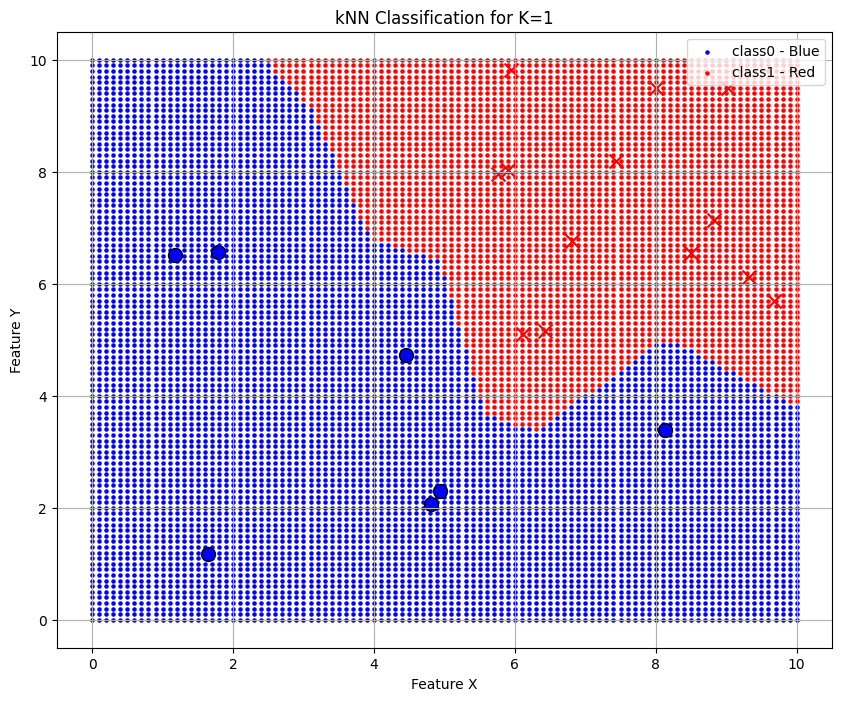

<ipython-input-7-c099aedc984d>:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(train_data[classes == 1][:, 0],train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)


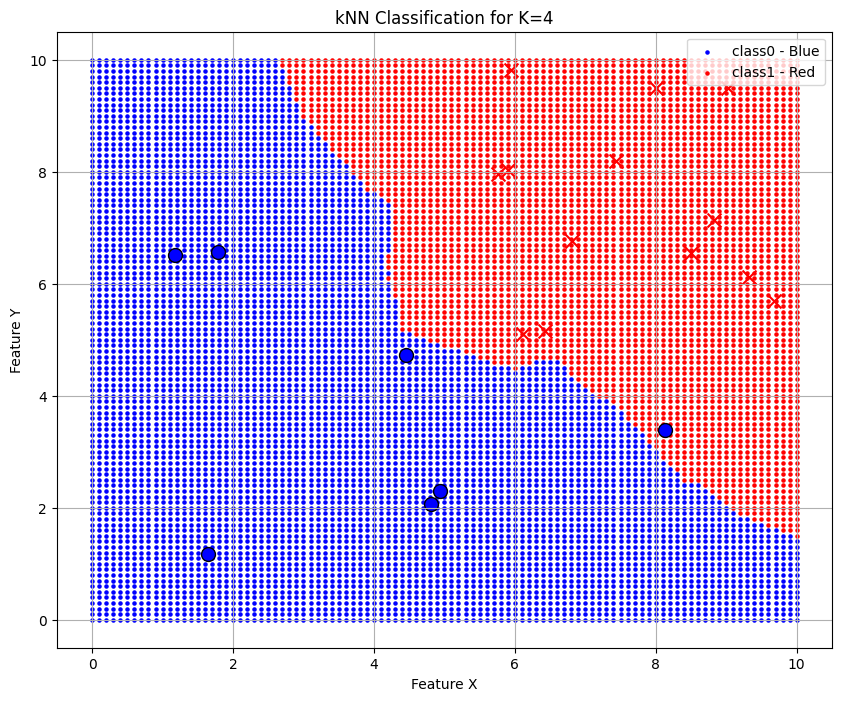

<ipython-input-7-c099aedc984d>:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(train_data[classes == 1][:, 0],train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)


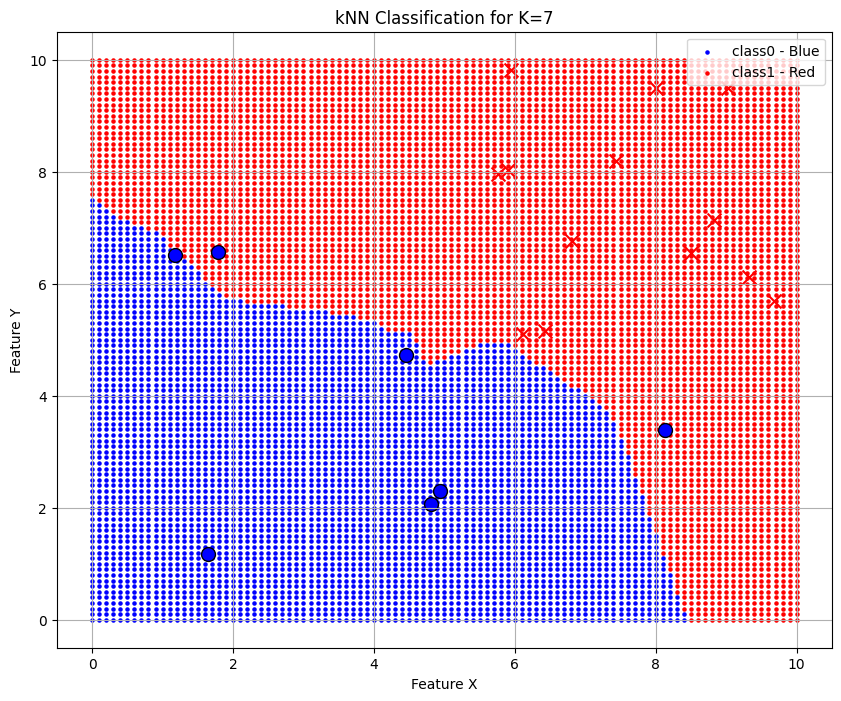

<ipython-input-7-c099aedc984d>:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(train_data[classes == 1][:, 0],train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)


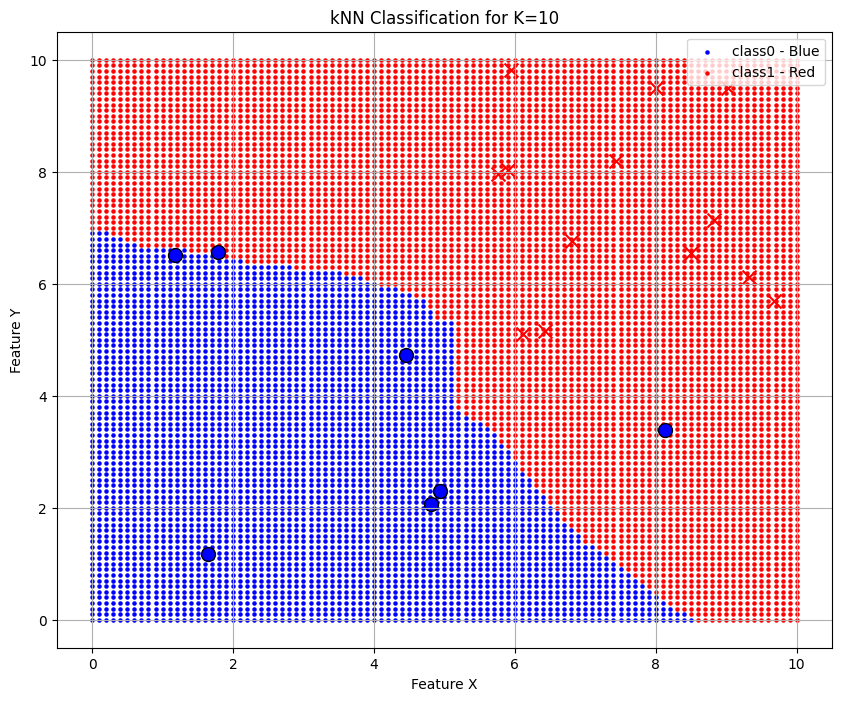

<ipython-input-7-c099aedc984d>:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(train_data[classes == 1][:, 0],train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)


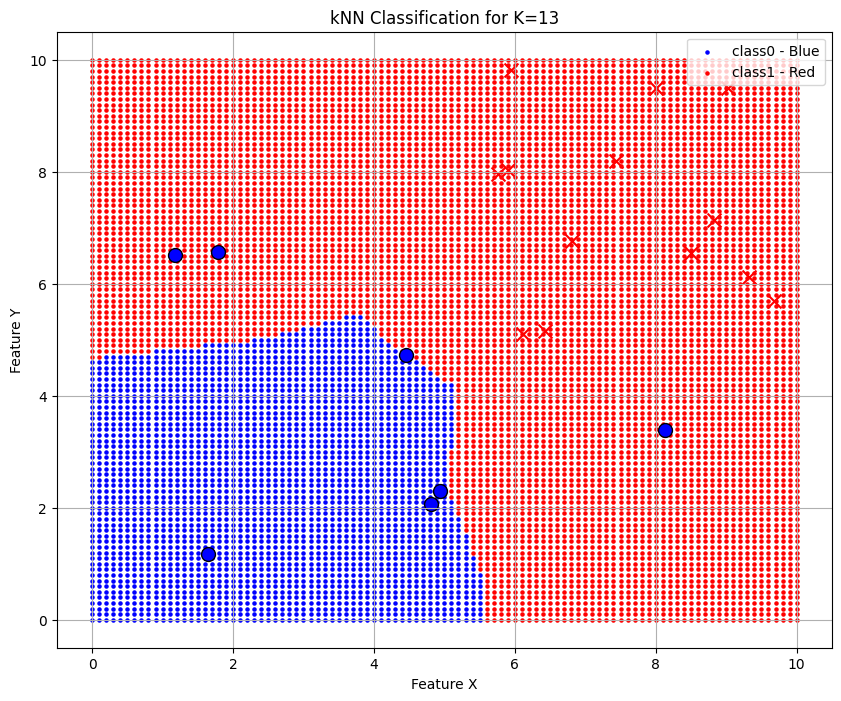

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
def plot_with_knn_predicted_values(train_data,test_data,k):
   #knn classifier
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(train_data, classes)
   predicted_classes = knn.predict(test_data)
   plt.figure(figsize=(10, 8))
   #plotting test data
   plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1],color='blue', label='class0 - Blue', s=5)
   plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1],color='red', label='class1 - Red', s=5)
   #plotting train data
   plt.scatter(train_data[classes == 0][:, 0],train_data[classes == 0][:, 1], color='blue', edgecolor='black', marker='o', s=100)
   plt.scatter(train_data[classes == 1][:, 0],train_data[classes == 1][:, 1], color='red', edgecolor='black', marker='x', s=100)
   plt.xlabel("Feature X")
   plt.ylabel("Feature Y")
   plt.title("kNN Classification for K="+str(k))
   plt.legend(loc='upper right')
   plt.grid(True)
   plt.show()
np.random.seed(0)
# generating random features between 1 to 10
X_feature= np.random.uniform(1, 10, 20)
Y_feature= np.random.uniform(1, 10, 20)
#classifing based on some condition
classes = np.where(((X_feature > 5) & (Y_feature > 5)), 1, 0)
X_feature_range = np.arange(0, 10.1, 0.1)
Y_feature_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_feature_range, Y_feature_range)
# meshgrid into 1D arrays
X_feature_test_flat = X_test.ravel()
Y_feature_test_flat = Y_test.ravel()
# Combining X and Y
test_data = np.c_[X_feature_test_flat, Y_feature_test_flat]
train_data = np.c_[X_feature, Y_feature]
# plotting the knn-classifier values with varoius k values
for k in range(1,16,3):
     plot_with_knn_predicted_values(train_data,test_data,k)

Mounted at /content/drive


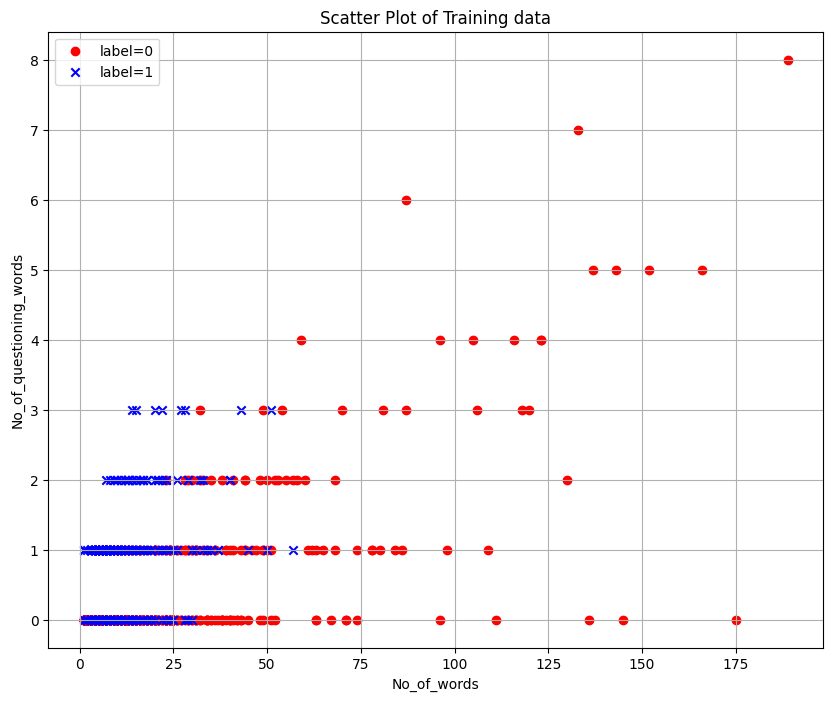

<ipython-input-6-34bb721223a1>:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')


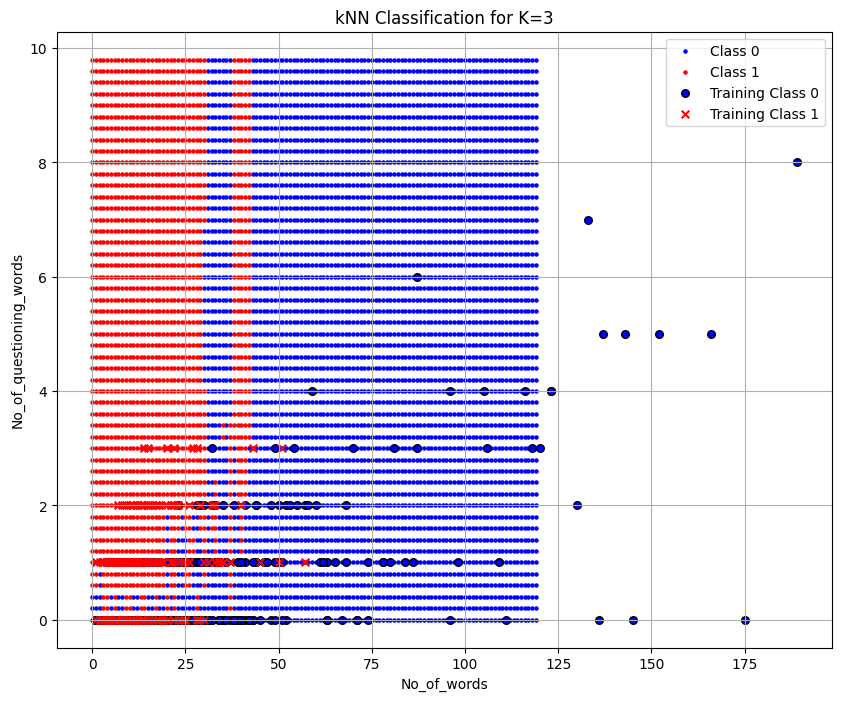

<ipython-input-6-34bb721223a1>:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')


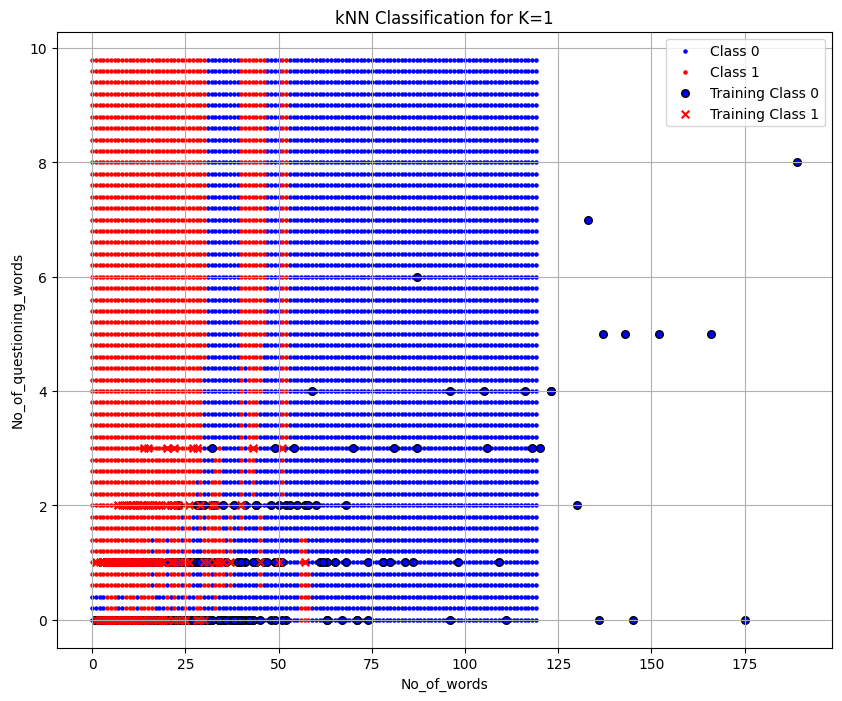

<ipython-input-6-34bb721223a1>:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')


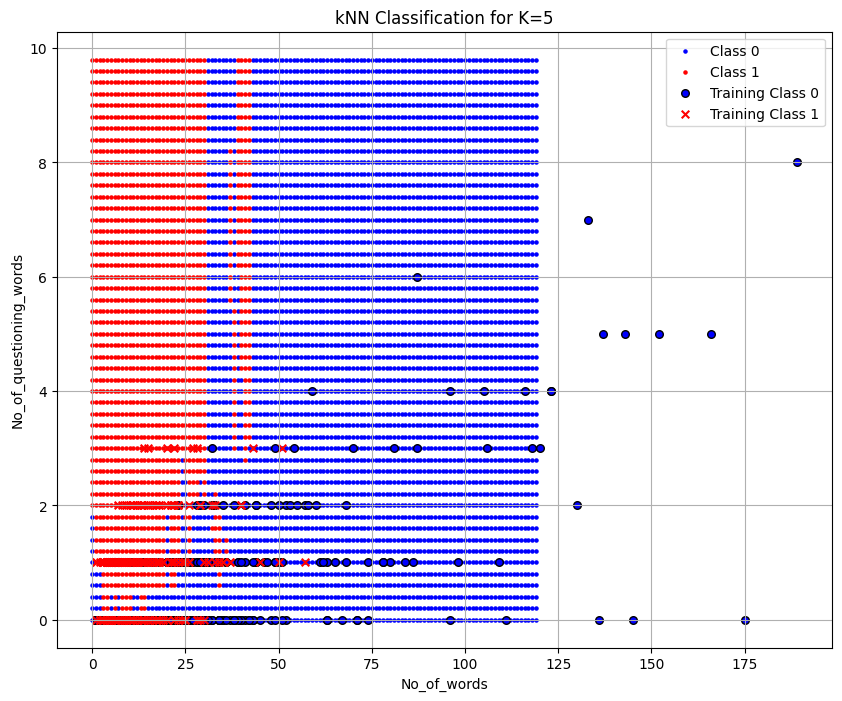

<ipython-input-6-34bb721223a1>:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')


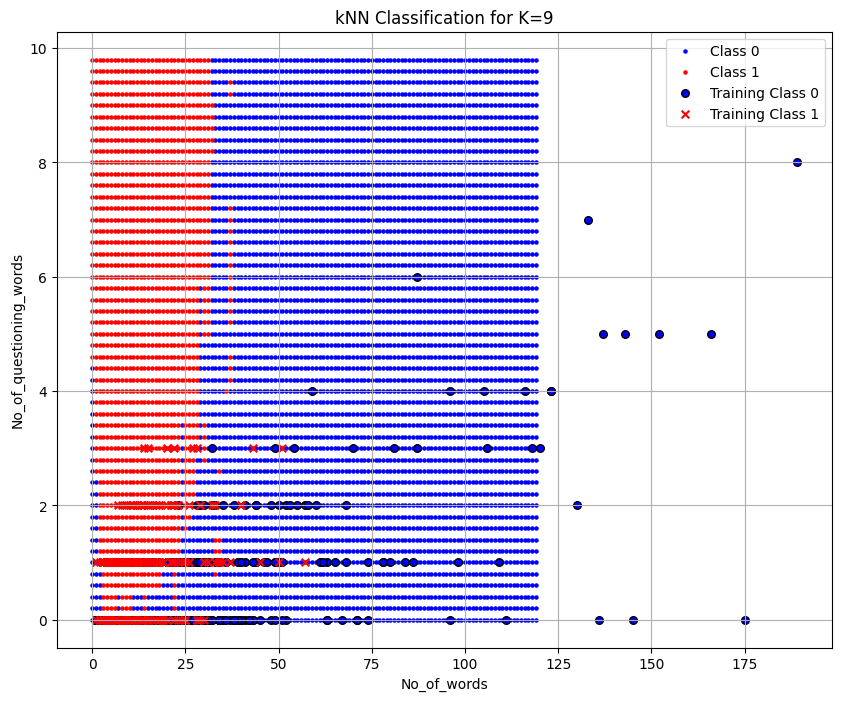

<ipython-input-6-34bb721223a1>:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')


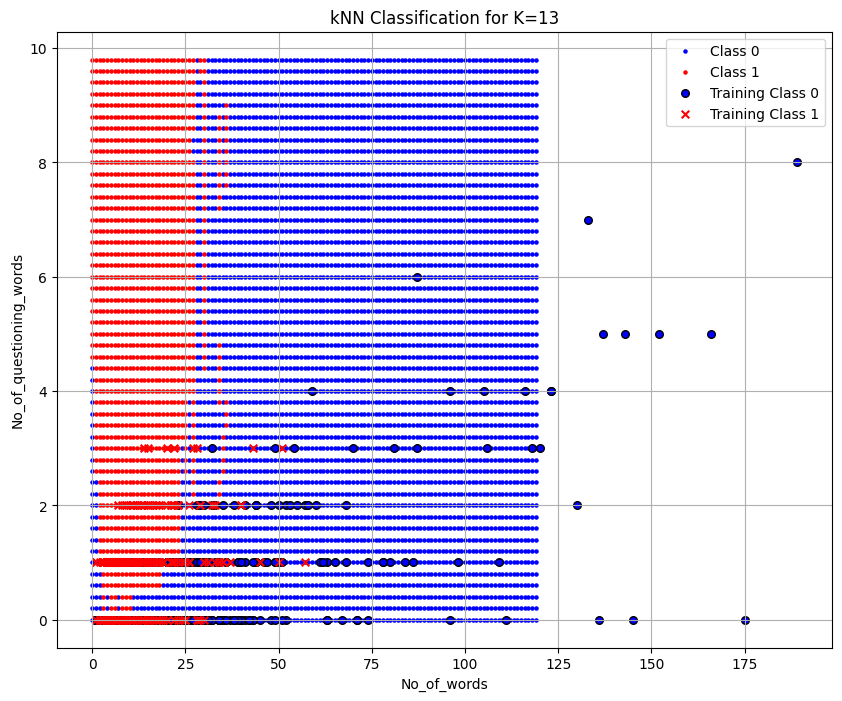

<ipython-input-6-34bb721223a1>:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')


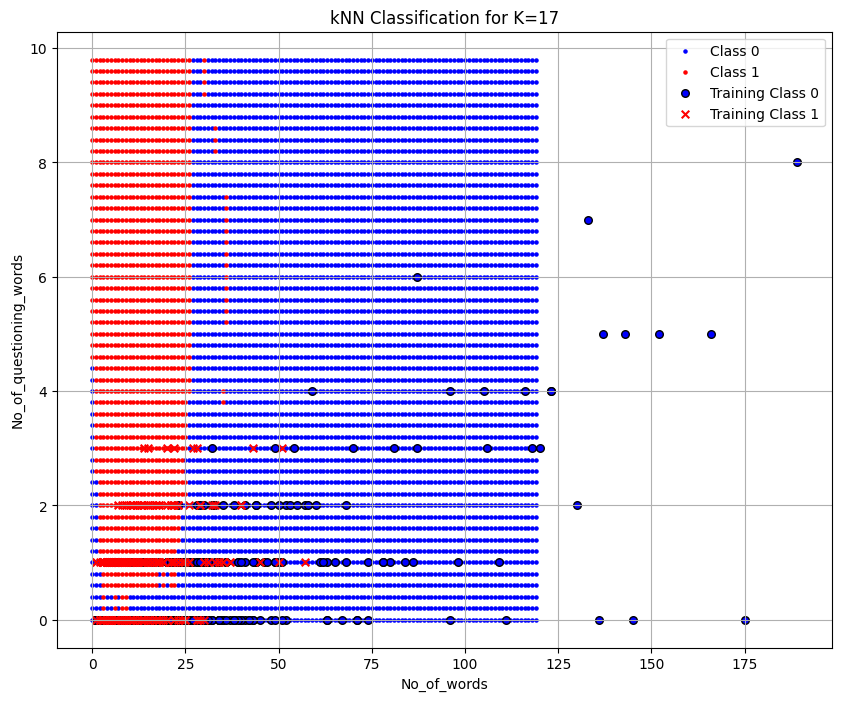

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
def plot_features(question_labels,answer_labels):
    #plotting
    plt.figure(figsize=(10, 8))
    #plotting features
    plt.scatter(question_labels['No_of_words'],question_labels['No_of_questoning_words'], color='red', label='label=0',marker='o')
    plt.scatter(answer_labels['No_of_words'], answer_labels['No_of_questoning_words'], color='blue', label='label=1',marker='x')
    plt.title('Scatter Plot of Training data')
    plt.xlabel('No_of_words')
    plt.ylabel('No_of_questioning_words')
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_with_knn_predicted_values(X_Y_features,labels,k):
    # generating random numbers for testing data
    # X=No_of_words , Y=No_of_questoning_words
    X_range = np.arange(0,120, 1)
    Y_range = np.arange(0,10, 0.2)
    X_test, Y_test = np.meshgrid(X_range, Y_range)
    X_test_flat = X_test.ravel()
    Y_test_flat = Y_test.ravel()
    test_data = np.c_[X_test_flat, Y_test_flat]
    #knn classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Y_features,labels)
    predicted_classes = knn.predict(test_data)
    #plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1], color='blue', label='Class 0', s=5)
    plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1], color='red', label='Class 1', s=5)
    plt.scatter(X_Y_features[labels == 0][:, 0], X_Y_features[labels == 0][:, 1], color='blue', edgecolor='black', marker='o', s=30, label='Training Class 0')
    plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', edgecolor='black', marker='x', s=30, label='Training Class 1')
    plt.xlabel("No_of_words")
    plt.ylabel("No_of_questioning_words")
    plt.title("kNN Classification for K="+str(k))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx')
#classification
question_labels= sentence_data[sentence_data['label'] == 0]
answer_labels=sentence_data[sentence_data['label'] == 1]
plot_features(question_labels,answer_labels)
# X=No_of_words , Y=No_of_questoning_words
X_Y_features = sentence_data[['No_of_words', 'No_of_questoning_words']].values
labels = sentence_data['label'].values
# plotting the knn-classifier values with k=3
plot_with_knn_predicted_values(X_Y_features,labels,3)
# plotting the knn-classifier values with varoius k values
for k in range(1,20,4):
    plot_with_knn_predicted_values(X_Y_features,labels,k)

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
def  Best_k_value(X_train, Y_train):
    # Defines the k values
    param_grid = {
        'n_neighbors': np.arange(1, 21)
    }
    #kNN classifier
    knn = KNeighborsClassifier()
    # GridSearchCV
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_k = grid_search.best_params_['n_neighbors']
    best_score = grid_search.best_score_
    return best_k, best_score
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx'
sentence_data = pd.read_excel(file_path)
# TF-IDF vectorization for extraction of text
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(sentence_data['Text'])
numerical_features = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']].values
combined_features = hstack([text_features, csr_matrix(numerical_features)])
labels = sentence_data['label'].values
#Spliting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(combined_features, labels, test_size=0.3, random_state=42)
# Findingthe best k value
best_k, best_score = Best_k_value(X_train, Y_train)
print(f"Best k value: {best_k}")
print(f"Best cross-validated accuracy score: {best_score:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best k value: 3
Best cross-validated accuracy score: 0.94
